In [2]:
import pandas as pd


df_jugadores = pd.read_csv('./csv/jugadores_cebollitas.csv')
x = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]
print(x)

    goles  asistencias  pases_completados (%)  tiros_al_arco
0       2            5                   89.0              8
1       2            8                   77.5             49
2       4            5                   87.3              1
3       2            4                   75.9              9
4       1            7                   83.5              0
5       3            3                   86.5             40
6       4            2                   90.2              2
7       5            4                   81.1             50
8       2            0                   86.8              0
9       4           10                   78.7              7
10      0            8                   89.0             10
11      3            8                   83.0              5
12      4            7                   85.9              5
13      2            3                   87.5              0
14      4            4                   90.7              2
15      5            3  

In [4]:
from sklearn.preprocessing import StandardScaler


# Aplicar la normalización de datos (StandardScaler)
# Esta técnica es útil para evitar la pérdida de información cuando se usan técnicas de aprendizaje automático.
# --------------------------------------------------------------------------------------------------------------
# StandardScaler es una clase que se encarga de normalizar los datos, es decir, de reducir la varianza de los
# datos a un valor especificado, generalmente 0, y de establecer la media a un valor especificado, generalmente 0.
#
# Parámetros:
# -----------
# None
#
# Métodos:
# --------
# fit(X)
#     Estima los parámetros de normalización a partir de los datos X.
#
# transform(X)
#     Aplica la transformación de normalización a los datos X.
#
# fit_transform(X)
#     Estima los parámetros de normalización a partir de los datos X y aplica la transformación de normalización a X.
#
# inverse_transform(X)
#     Aplica la transformación inversa de normalización a los datos X.
#
scaler = StandardScaler()

# Aplicamos la transformación de normalización a los datos
x_scaled = scaler.fit_transform(x)

# x_scaled contiene los datos normalizados
print(x_scaled)

[[-0.62876771  0.19759771  1.10308399 -0.40068256]
 [-0.62876771  1.27540337 -1.09925384  1.91311814]
 [ 0.85068573  0.19759771  0.77752101 -0.7957217 ]
 [-0.62876771 -0.16167085 -1.40566606 -0.3442484 ]
 [-1.36849443  0.91613482  0.04979199 -0.85215587]
 [ 0.11095901 -0.52093941  0.6243149   1.40521067]
 [ 0.85068573 -0.88020796  1.33289316 -0.73928754]
 [ 1.59041245 -0.16167085 -0.40982634  1.9695523 ]
 [-0.62876771 -1.59874507  0.68176719 -0.85215587]
 [ 0.85068573  1.99394048 -0.86944468 -0.45711672]
 [-2.10822116  1.27540337  1.10308399 -0.28781423]
 [ 0.11095901  1.27540337 -0.04596183 -0.56998505]
 [ 0.85068573  0.91613482  0.50941032 -0.56998505]
 [-0.62876771 -0.52093941  0.81582254 -0.85215587]
 [ 0.85068573 -0.16167085  1.42864698 -0.73928754]
 [ 1.59041245 -0.52093941 -0.6970878   1.85668398]
 [ 0.85068573 -1.59874507 -0.31407253 -0.51355089]
 [-1.36849443 -0.16167085  0.01149046 -0.06207758]
 [-0.62876771 -0.16167085 -2.11424432 -0.3442484 ]
 [ 0.11095901 -1.59874507 -1.48

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

df_jugadores['PC1'] = components[:, 0]
df_jugadores['PC2'] = components[:, 1]

print(df_jugadores)

    jugador_id               nombre       posición  edad  partidos_jugados  \
0            1         Tara Alvarez        Portero    18                25   
1            2        Carol Mcclain  Mediocampista    32                12   
2            3        Robert Martin        Defensa    26                12   
3            4    Mr. Robert Turner        Defensa    25                17   
4            5  Christopher Kennedy        Defensa    35                23   
5            6  Dr. Justin Anderson  Mediocampista    33                16   
6            7      Sandra Shepherd        Portero    35                23   
7            8          Mark Bowers  Mediocampista    28                14   
8            9         Kenneth Cook        Portero    25                15   
9           10    Christopher Parks        Portero    26                12   
10          11   Michelle Henderson        Defensa    35                17   
11          12       Steven Wallace        Defensa    18        

<Axes: xlabel='PC1', ylabel='PC2'>

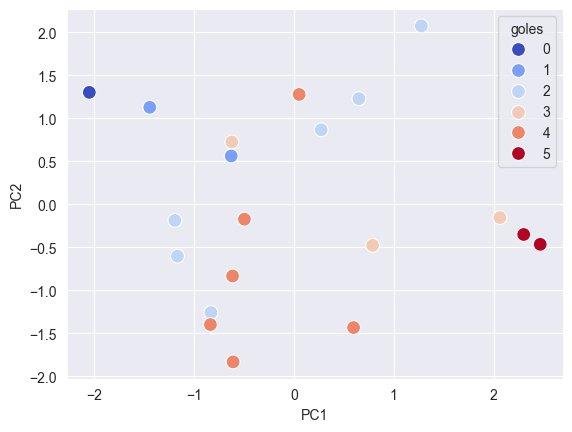

In [6]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

<Axes: xlabel='PC1', ylabel='PC2'>

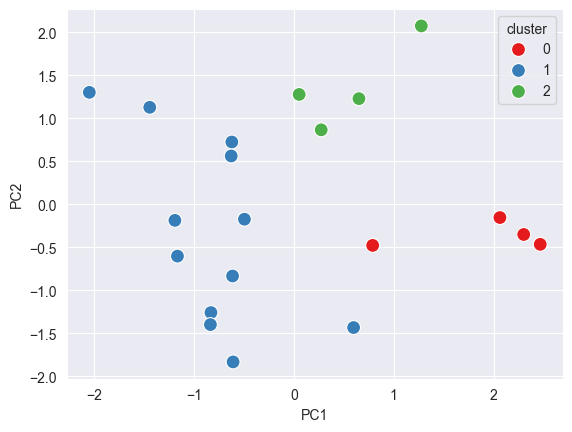

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(x_scaled)

sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='cluster', palette='Set1', s=100)

In [8]:
varianza = pca.explained_variance_ratio_

print(f'Varianza explicada por PC1: {varianza[0]:.2%}')
print(f'Varianza explicada por PC2: {varianza[1]:.2%}')
print(f'Varianza explicada por PC1 y PC2: {varianza[0] + varianza[1]:.2%}')

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza explicada por PC1 y PC2: 67.04%
